In [1]:
# Unsupervised Outlier Detection using Local Outlier Factor (LOF)
#(It is unsupervised because there is no label indicating whether a data point is outlier or not)
# It finds a patterin in data itself
# this method really didin't work well in this selected dataset. I've added it here just for the sake of sample code!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import LocalOutlierFactor

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial')
sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial")
!pwd

/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial


In [4]:
df = pd.read_csv('datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

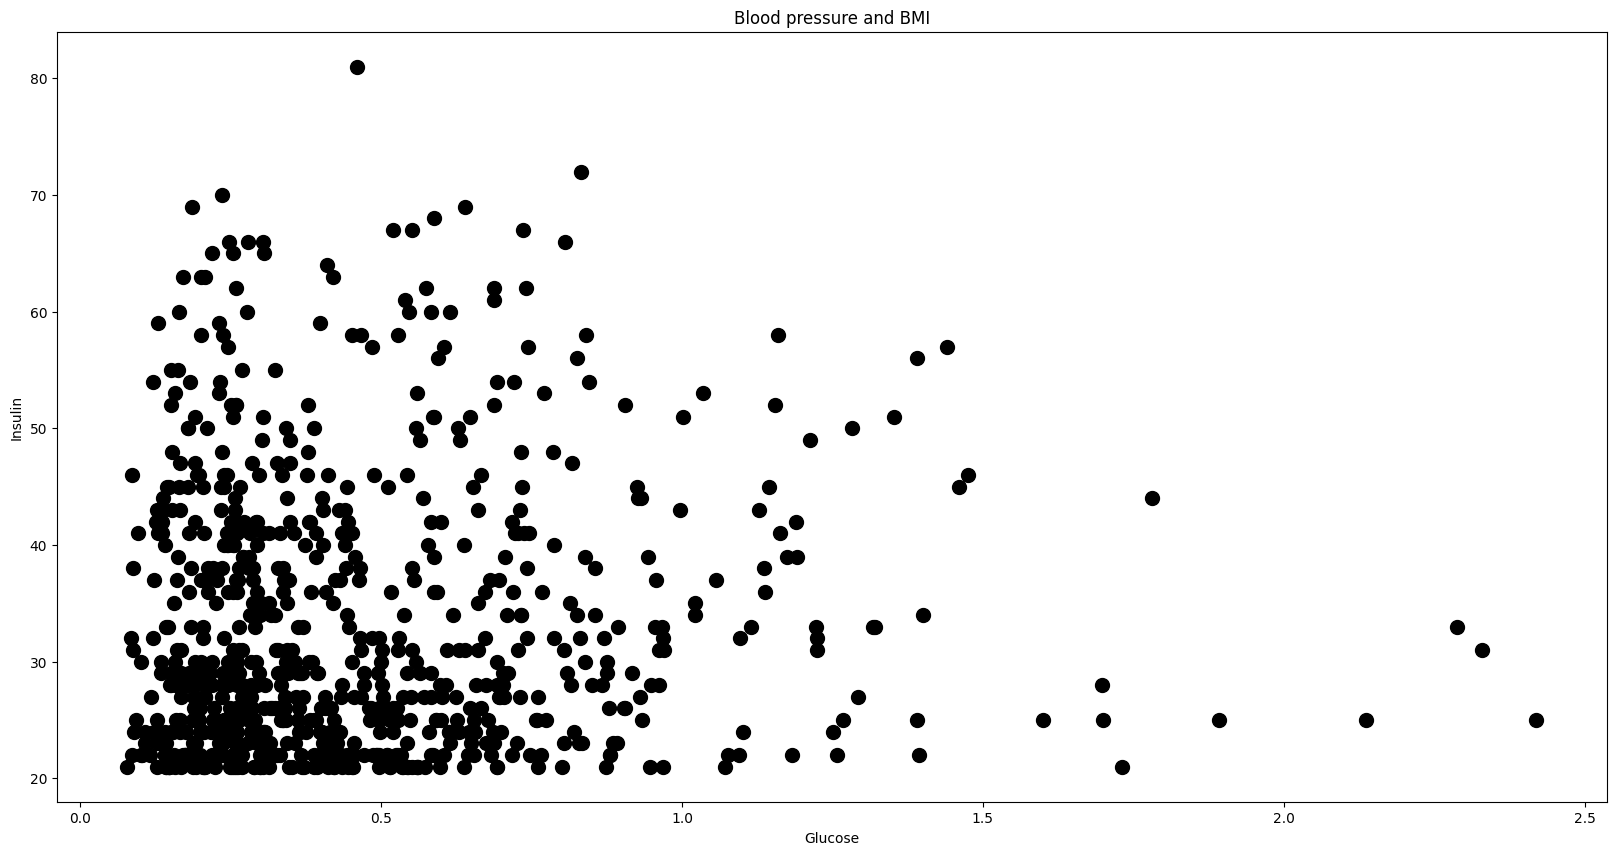

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(df['DiabetesPedigreeFunction'],
            df['Age'],
            color='black',
            s=100)

ax.set(xlabel='Glucose', ylabel='Insulin', title='Blood pressure and BMI')
plt.show();

In [8]:
X = df[:-1]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#contamination: The proportion of outlier exist in the dataset
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)

In [11]:
y_pred = lof.fit_predict(X)
n_outlier = (y_pred == -1).sum()
n_outlier

154

In [12]:
b= np.array([1])
y_pred = np.concatenate((y_pred, b), axis=0)

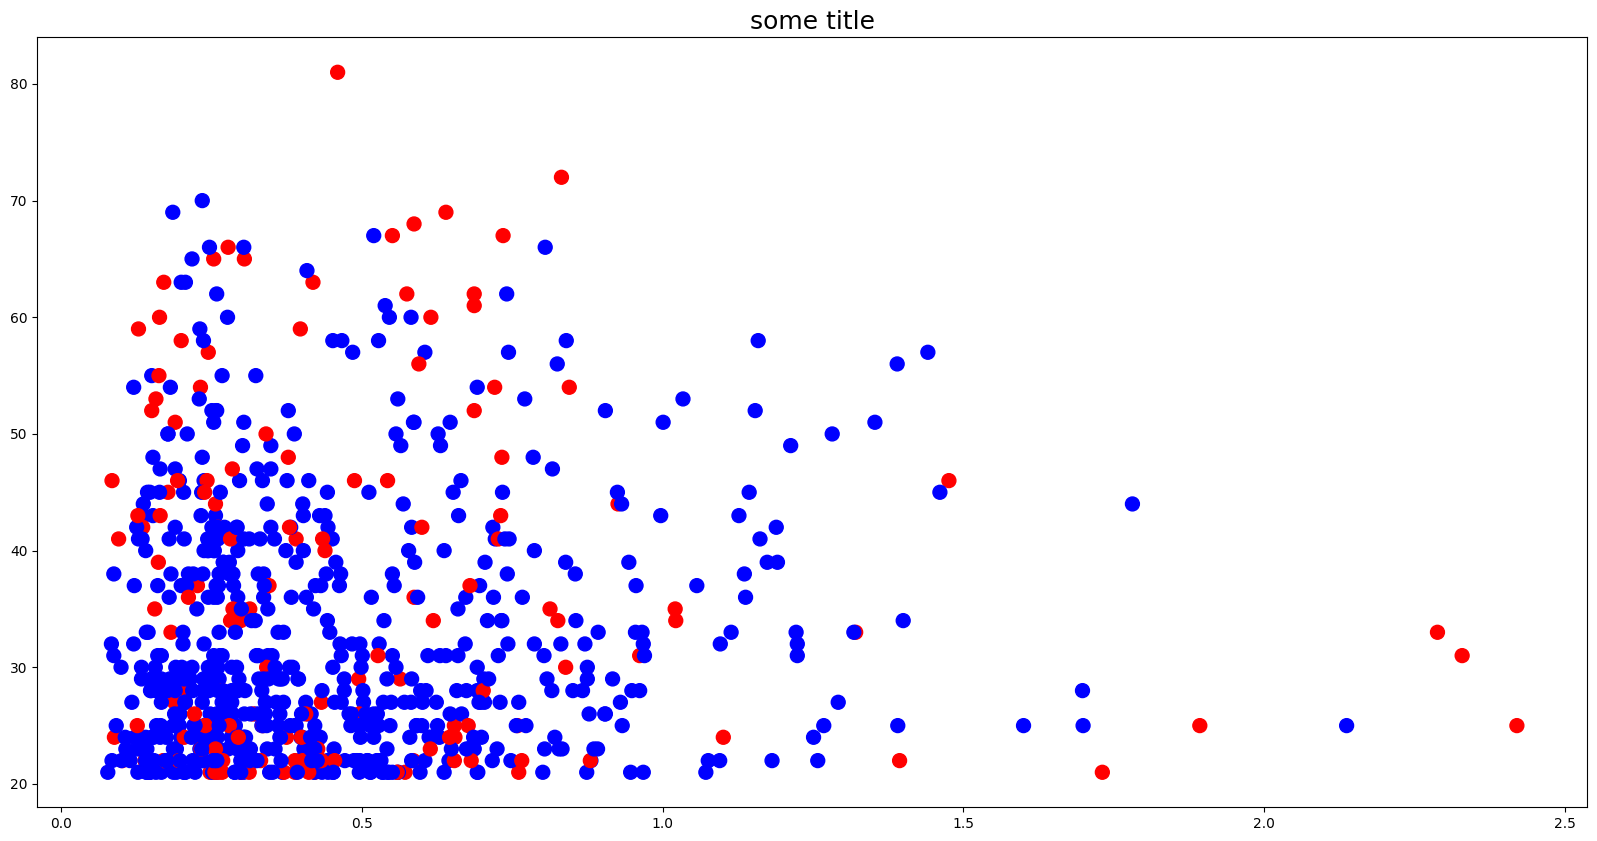

In [13]:
colors = np.array(['r','b'])

plt.figure(figsize=(20,10))

plt.title("some title", size=18)

plt.scatter(df['DiabetesPedigreeFunction'],
            df['Age'],
            color=colors[(y_pred+1) // 2 ],
            s=100)

plt.show();

In [14]:
X_score = lof.negative_outlier_factor_
X_score

array([-1.06670781, -1.01138465, -1.07964805, -0.9796959 , -1.16949099,
       -0.95585323, -1.08886398, -0.95415053, -1.24064769, -1.62500847,
       -1.08836512, -1.02100052, -1.03460783, -2.59693313, -1.05225335,
       -0.95068654, -1.0650121 , -0.97556351, -1.48152884, -0.9854594 ,
       -1.05772178, -1.06603366, -1.11533188, -1.01212675, -1.03873847,
       -0.97845408, -1.00173256, -1.08075878, -1.15013764, -1.04965503,
       -1.11453072, -1.04146486, -0.96755424, -1.22420753, -1.05515025,
       -1.01331736, -0.98616232, -1.04483754, -1.06090736, -1.07268205,
       -1.46663597, -0.98894451, -1.11723374, -1.15611734, -1.01548414,
       -1.15752613, -1.15472164, -1.15196752, -1.01337874, -1.0149516 ,
       -1.06816638, -1.09869437, -1.17019585, -0.9984802 , -1.04953709,
       -1.19361118, -1.00510327, -1.34115776, -1.02680957, -1.03281017,
       -1.09153033, -0.97867772, -1.50676374, -1.0464823 , -0.97187452,
       -0.967607  , -1.04034565, -1.16789606, -1.01029332, -1.13